### Importación de Tensorflow

In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importación de datos 

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

/home/sia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### verificando los datos de prueba

In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
imagendemo=np.reshape(mnist.train.images[2,:],(28,28))

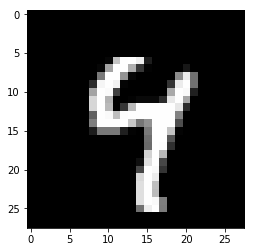

In [0]:
plt.imshow(imagendemo,cmap='gray')

### Declarando la arquitectura

Generando función 

In [0]:
def Neural_network_model(
    n_nodes_hl1=50,
    n_nodes_hl2=2,
    n_nodes_hl3=50,
    n_nodes_hl4=784
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784])
    
    
    # Declarando las variables 
    
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}
   
    
    
    # Declarando la arquitectura
    
    l1 = tf.add(tf.matmul(x,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.tanh(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.tanh(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.tanh(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
   
    
    
    
    # Declarando la funcion de costo y entrenmiento
    cost = tf.reduce_mean(tf.squared_difference(x,l4) )
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(cost)
    
    return dict(
              x=x,
              embeding=l2,
              output=l4,
              cost=cost,
              optimizer=optimizer
              )

In [0]:
Neural_network_model()

{'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'embeding': <tf.Tensor 'Tanh_1:0' shape=(?, 2) dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'output': <tf.Tensor 'Relu:0' shape=(?, 784) dtype=float32>,
 'x': <tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>}

In [0]:
def train_neural_network(DNN, hm_epochs=200,batch_size=20):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                feed_dict={DNN["x"]: epoch_x}
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["embeding"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c
            if epoch%500==0:
                print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        #correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        #accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        #print('Accuracy:',accuracy.eval({DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels}))
        print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
        return prediction, y


In [0]:
DNN=Neural_network_model()
imagenes, char=train_neural_network(DNN,hm_epochs=20000)

Epoch 0 completed out of 20000 loss: 11747.603204190731
Epoch 500 completed out of 20000 loss: 215.8083559833467
Epoch 1000 completed out of 20000 loss: 188.9343778938055
Epoch 1500 completed out of 20000 loss: 176.46150851249695
Epoch 2000 completed out of 20000 loss: 169.6358629912138
Epoch 2500 completed out of 20000 loss: 165.58922507986426
Epoch 3000 completed out of 20000 loss: 163.2282745614648
Epoch 3500 completed out of 20000 loss: 161.63923232257366
Epoch 4000 completed out of 20000 loss: 159.84319645911455
Epoch 4500 completed out of 20000 loss: 158.53334940224886
Epoch 5000 completed out of 20000 loss: 156.9054567180574
Epoch 5500 completed out of 20000 loss: 156.32371571287513
Epoch 6000 completed out of 20000 loss: 152.99478881061077
Epoch 6500 completed out of 20000 loss: 150.48214695975184
Epoch 7000 completed out of 20000 loss: 149.3698545359075
Epoch 7500 completed out of 20000 loss: 148.00485984236002
Epoch 8000 completed out of 20000 loss: 144.86849219352007
Epoch 8

784


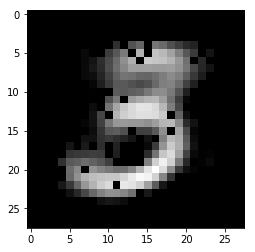

In [0]:
import matplotlib.pyplot as plt
print(len(imagenes[5]))
plt.imshow(np.reshape(imagenes[0],(28,28)),cmap='gray')

